# **Computal Methods Project - Noam Tishler**

FACULTY OF EXACT SCIENCES | GEOPHYSICS & PLANETARY SCIENCES  
Tel Aviv University

## Part A: getting information About the Kinneret and the meteorological stations. ##

---


In [254]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error 
from sklearn.ensemble import RandomForestRegressor
%matplotlib inline

First we load the databases from the following websites:

Kinneret:
https://data.gov.il/api/3/action/datastore_search?resource_id=2de7b543-e13d-4e7e-b4c8-56071bc4d3c8&limit=99999

These site is already included in the input data of the dataset as datastore_search respectively.


In [255]:
#Loading the data 
with open('datastore_search','r') as file:
  dataset_kinneret = json.load(file) 

When inspecting the datasets we see that they have JSON/dictionary type of format.
Next, we filter out the relevant data.

In [256]:
filtered_kinneret=(dataset_kinneret['result']['records'])
df_kinneret=pd.DataFrame(filtered_kinneret)
list(df_kinneret.columns)


['_id', 'Survey_Date', 'Kinneret_Level']

In [257]:
df_kinneret['Kinneret_Level']=df_kinneret['Kinneret_Level'].astype('float64')
df_kinneret["Survey_Date"] = pd.to_datetime(df_kinneret["Survey_Date"], format="%Y%m%dT%H:%M:%S")
df_kinneret = df_kinneret.set_index('_id')
df_kinneret.rename(columns={"Survey_Date": 'Date'}, inplace=True)

The Kinneret Level from first measures til present

Text(0, 0.5, 'Level[cm]')

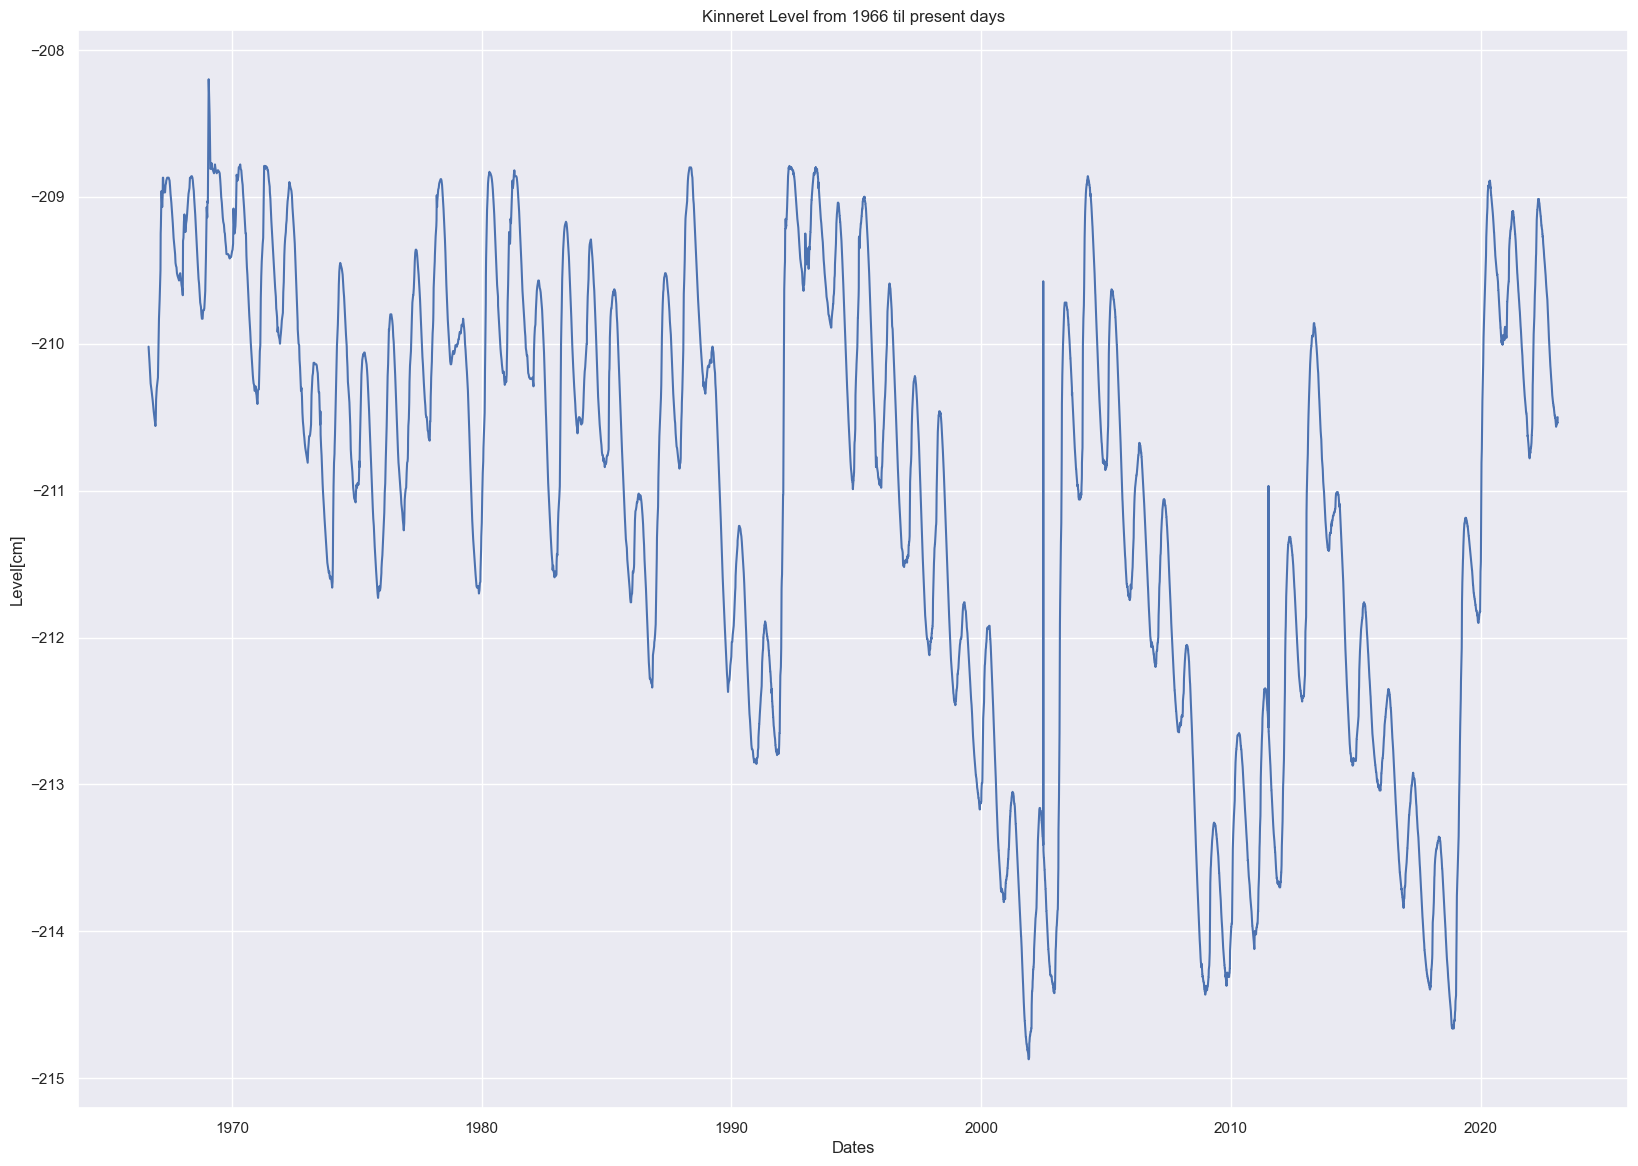

In [258]:
plt.figure(figsize=(20,14))
sns.lineplot(x=df_kinneret['Date'], y=df_kinneret.loc[:,'Kinneret_Level'])
plt.title('Kinneret Level from 1966 til present days')
plt.xlabel('Dates')
plt.ylabel('Level[cm]')

*For my research, I need information from 1991-11-01 till 1997-11-01*

In [237]:
#Making a new data frame for the specific date range.
df_kinneret_90s = df_kinneret[(df_kinneret['Date'] >= '1991-11-01') & (df_kinneret['Date'] <= '1997-11-01')]

Text(0, 0.5, 'Level[m]')

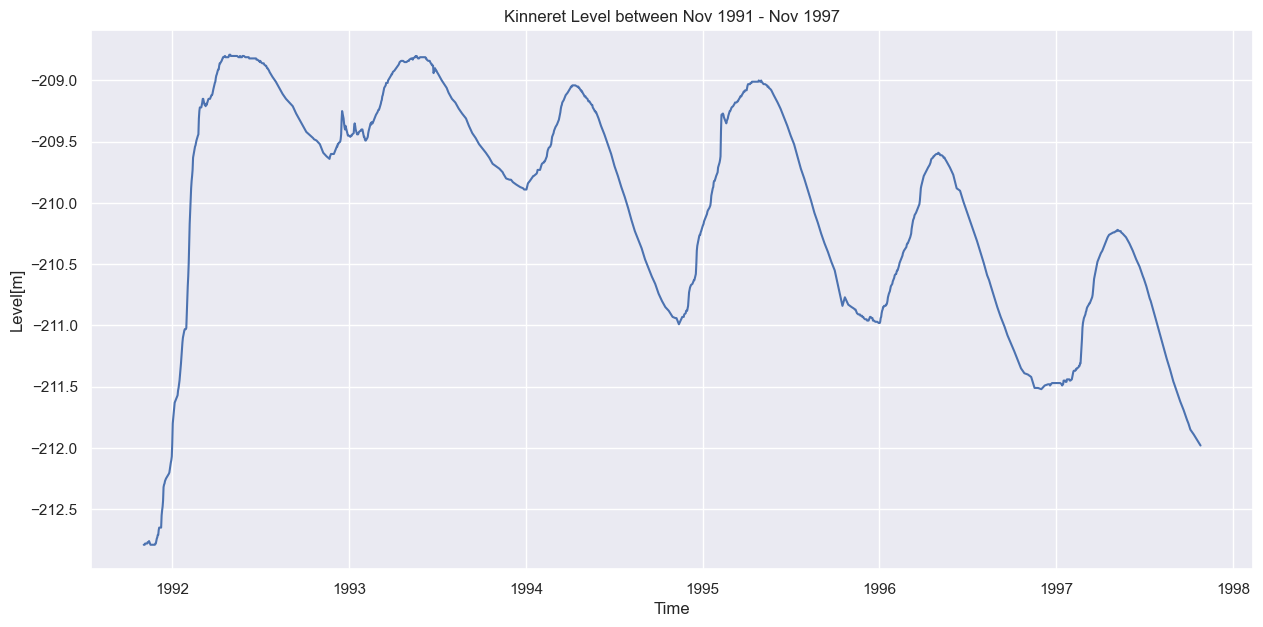

In [263]:
#Plotting the Kinneret level with the specific dates
plt.figure(figsize=(15,7))
sns.lineplot(x = df_kinneret_90s['Date'], y = df_kinneret_90s['Kinneret_Level'])
plt.title('Kinneret Level between Nov 1991 - Nov 1997')
plt.xlabel('Time')
plt.ylabel('Level[m]')

*We can see the since the big winter in 1991/1992 the Kinneret Level got low and lower through the years.*

*Now I will make a calculation for the monthly average of the Kinneret Elevation*


In [264]:
df_kinneret_90s['Month'] = df_kinneret_90s['Date'].dt.month
df_kinneret_90s['Year'] = df_kinneret_90s['Date'].dt.year

# Grouping by year and month and calculating the average elevation
df_kinneret_90s_avg = df_kinneret_90s.groupby(['Year', 'Month'], as_index=False).mean()

# Creating a single date column combining year and month
df_kinneret_90s_avg['Date'] = df_kinneret_90s_avg['Year'].astype(str) + '-' + df_kinneret_90s_avg['Month'].astype(str)
df_kinneret_90s_avg['Date'] = pd.to_datetime(df_kinneret_90s_avg['Date'], format='%Y-%m')

# Keeping only the necessary columns
df_kinneret_90s_avg = df_kinneret_90s_avg[['Date', 'Kinneret_Level']]

Calculation the rate of the Kinneret Level and visualize it

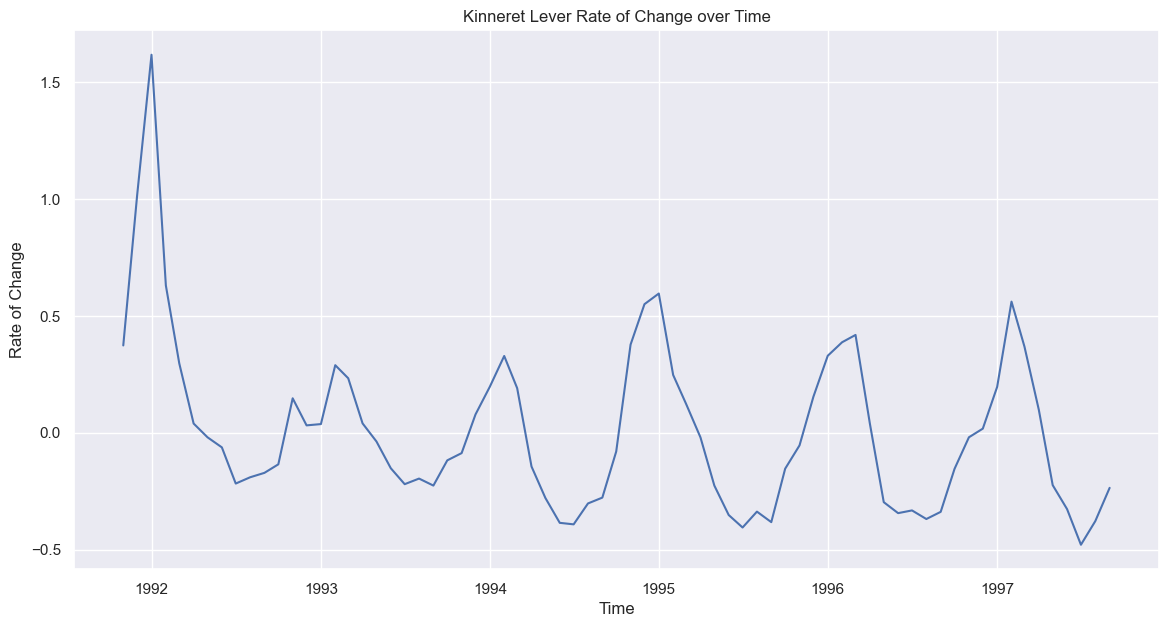

In [275]:
df_kinneret_90s_avg['rate_of_change'] = (df_kinneret_90s_avg['Kinneret_Level'].shift(-1) - df_kinneret_90s_avg['Kinneret_Level']) / 1

plt.figure(figsize = (14,7))
sns.lineplot(x = df_kinneret_90s_avg['Date'], y = df_kinneret_90s_avg['rate_of_change'])
plt.xlabel('Time')
plt.ylabel('Rate of Change')
plt.title('Kinneret Lever Rate of Change over Time')
plt.show()

We can see that in the winter the rate is positive and in the summer the rate is negative.
As usual for Israeli seasons - Winter is wet, Summer is dry.
If we look closely, we see that since 1992 ,the rate in the summer is getting **lower!** 


*in the next part, I will need to have a comparement with the kinneret values between 1997-2007*

In [266]:
#For later on, I will need the Kinneret level values from 1997-2005
df_kinneret_00s = df_kinneret[(df_kinneret['Date'] >= '1997-11-01') & (df_kinneret['Date'] <= '2005-11-01')]
df_kinneret_00s['Month'] = df_kinneret_00s['Date'].dt.month
df_kinneret_00s['Year'] = df_kinneret_00s['Date'].dt.year

df_kinneret_00s_avg = df_kinneret_00s.groupby(['Year', 'Month'], as_index=False).mean()


df_kinneret_00s_avg['Date'] = df_kinneret_00s_avg['Year'].astype(str) + '-' + df_kinneret_00s_avg['Month'].astype(str)
df_kinneret_00s_avg['Date'] = pd.to_datetime(df_kinneret_00s_avg['Date'], format='%Y-%m')


df_kinneret_00s_avg = df_kinneret_00s_avg[['Date', 'Kinneret_Level']]


C:\Users\noamt\AppData\Local\Temp\ipykernel_77460\42224853.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kinneret_00s['Month'] = df_kinneret_00s['Date'].dt.month
C:\Users\noamt\AppData\Local\Temp\ipykernel_77460\42224853.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kinneret_00s['Year'] = df_kinneret_00s['Date'].dt.year


Now, I will load the Meteorological Stations data.
the data is from the Israel Meteorologic Service (IMS) website:

https://ims.gov.il/he/data_gov

All 3 stations (Banias, Ein Zivan, Ginosar) are from this site.
The merged file is indeed from the site. Notice that every NaN value is a problem at the station while 0 is the measure of that month.



In [267]:
df_stations = pd.read_csv("Merged_Stations_Rain_Data.csv")
df_stations['Date'] = pd.to_datetime(df_stations['Date'], format = '%d/%m/%Y')
df_stations = df_stations.set_index('Date')

print(f"the Stations data has {len(df_stations)} lines")

the Stations data has 60 lines


Checking how much rows with NaN values are

In [268]:
df_stations_filtered = df_stations.dropna(how='any')
print(f"{len(df_stations) - len(df_stations_filtered)} rows with NaN values removed from the dataset")

15 rows with NaN values removed from the dataset


15 rows out of 60 is too much to neglect.
Interpolate the merged stations data frame to plot the comparement.

In [269]:
# Fill the missing data with interpolation
df_stations.interpolate(method="linear", inplace=True)

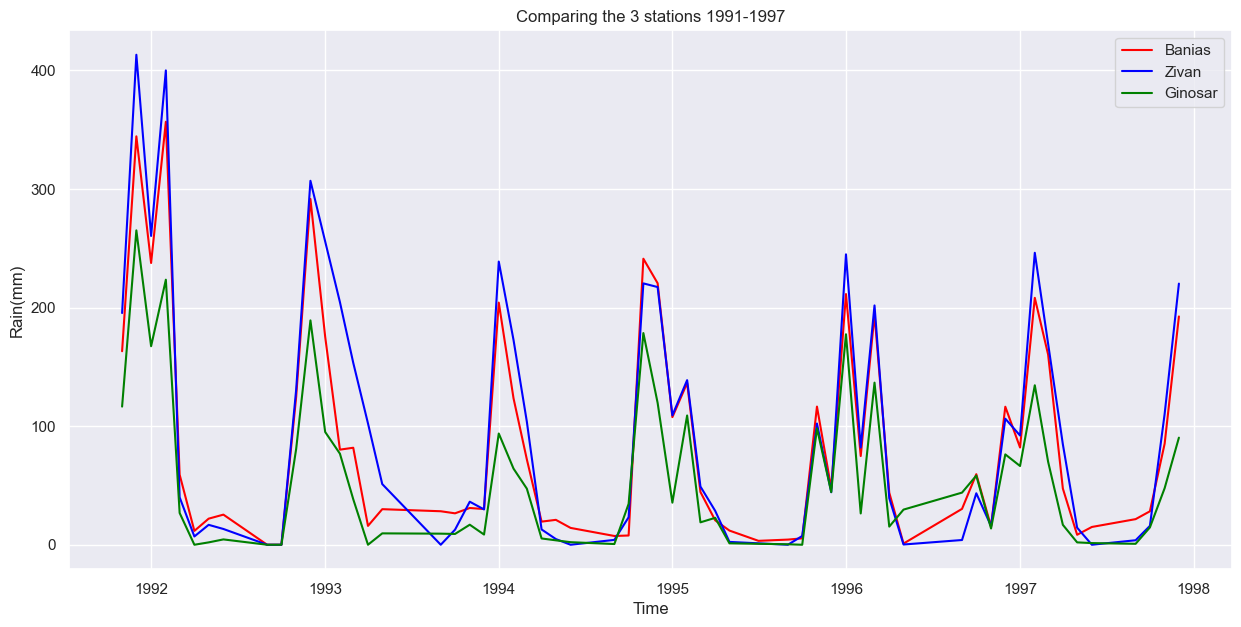

In [271]:
# Plotting the 3 stations comparement 1991-1997
plt.figure(figsize=(15,7))
plt.plot(df_stations.index, df_stations['Banias_Rain'], color='red', label='Banias')
plt.plot(df_stations.index, df_stations['Zivan_Rain'], color='blue', label='Zivan')
plt.plot(df_stations.index, df_stations['Ginosar_Rain'], color='green', label='Ginosar')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Rain(mm)')
plt.title('Comparing the 3 stations 1991-1997')
plt.show()

### Statistics 

In [246]:
df_stations.describe()

,Banias_Rain,Zivan_Rain,Ginosar_Rain
count,60.000000,60.000000,60.000000
mean,86.013333,96.762500,54.044167
std,91.092149,106.101314,63.317360
min,0.000000,0.000000,0.000000
25%,18.600000,11.375000,4.308333
50%,45.950000,46.700000,28.216667
75%,127.625000,170.300000,83.175000
max,356.700000,413.200000,265.100000


We see that **Ein Zivan** station has "won" all the categories and have the most rain over the years. 


------------------------------------------------------------------------------------------------

## Part B: Does rain information from a meteorological station in the drainage basin of the Kinneret, can influence the Kinneret Level? ##



Lets begin with merging the Kinneret data set with the stations data set. 

In [247]:
station_with_kinneret =pd.merge(df_stations, df_kinneret_90s_avg, on="Date", how="inner")

In [248]:
station_with_kinneret.describe()

,Banias_Rain,Zivan_Rain,Ginosar_Rain,Kinneret_Level,rate_of_change
count,58.000000,58.000000,58.000000,58.000000,57.000000
mean,84.191379,94.400862,53.528448,-210.108312,0.090591
std,91.578400,106.659672,64.231768,0.981712,0.360865
min,0.000000,0.000000,0.000000,-212.780952,-0.405500
25%,16.800000,8.725000,3.925000,-210.830200,-0.153750
50%,44.200000,43.850000,26.600000,-209.773432,0.037302
75%,124.400000,165.487500,79.800000,-209.385542,0.289444
max,356.700000,413.200000,265.100000,-208.803000,1.618591


Plotting each station with the Kinneret level

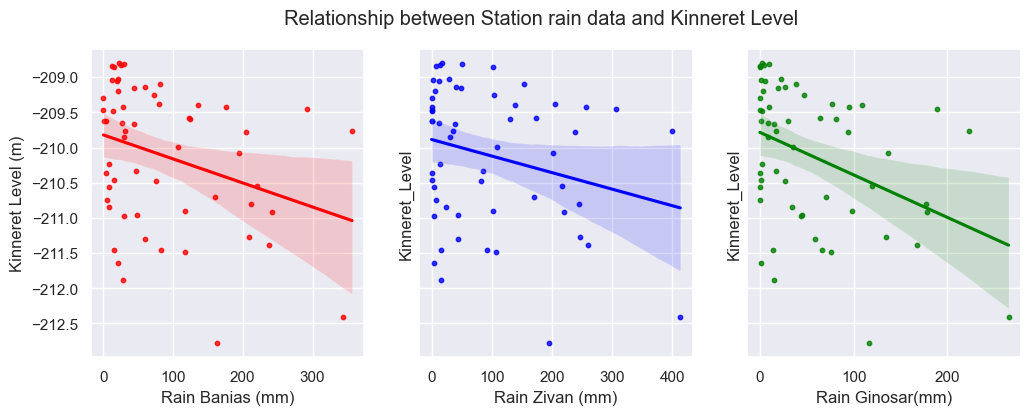

In [249]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4), sharey=True)
sns.regplot(x="Banias_Rain", y="Kinneret_Level", 
            data=station_with_kinneret,color = 'red' , scatter_kws={"s": 10}, ax=axs[0])
sns.regplot(x="Zivan_Rain", y="Kinneret_Level", 
            data=station_with_kinneret,color = 'blue' , scatter_kws={"s": 10}, ax=axs[1])
sns.regplot(x="Ginosar_Rain", y="Kinneret_Level", 
            data=station_with_kinneret,color = 'green' , scatter_kws={"s": 10}, ax=axs[2])
axs[0].set_xlabel("Rain Banias (mm)")
axs[1].set_xlabel("Rain Zivan (mm)")
axs[2].set_xlabel("Rain Ginosar(mm)")
axs[0].set_ylabel("Kinneret Level (m)")
fig.suptitle("Relationship between Station rain data and Kinneret Level")
plt.show()

We see that the fit isn't much accurate, or telling us something.
One thing we can see is that the **Ein Zivan** maybe has the most influence from preventing the Kinneret to get much lower.

Prepairing the data with Machine Learning to predict the Kinneret level between 1997-2005

In [250]:
X1 = station_with_kinneret['Banias_Rain'].values.reshape(-1, 1)
X2 = station_with_kinneret['Zivan_Rain'].values.reshape(-1, 1)
X3 = station_with_kinneret['Ginosar_Rain'].values.reshape(-1, 1)
y = station_with_kinneret["Kinneret_Level"].values

#I will use the RandomForestRegressor from the sklearn library for fitting the data.
model1 = RandomForestRegressor().fit(X1, y)
model2 = RandomForestRegressor().fit(X2, y)
model3 = RandomForestRegressor().fit(X3, y)

In [251]:
#Creating a data frame for filling the predicted data between 1997-2005
Date = pd.date_range(start='1997-12-01', end='2005-11-01', freq='M')
X_pred = np.arange(len(Date)).reshape(-1, 1)
y1_pred = model1.predict(X_pred)
y2_pred = model2.predict(X_pred)
y3_pred = model3.predict(X_pred)

Plotting each station with predicted Kinneret level vs Actual level

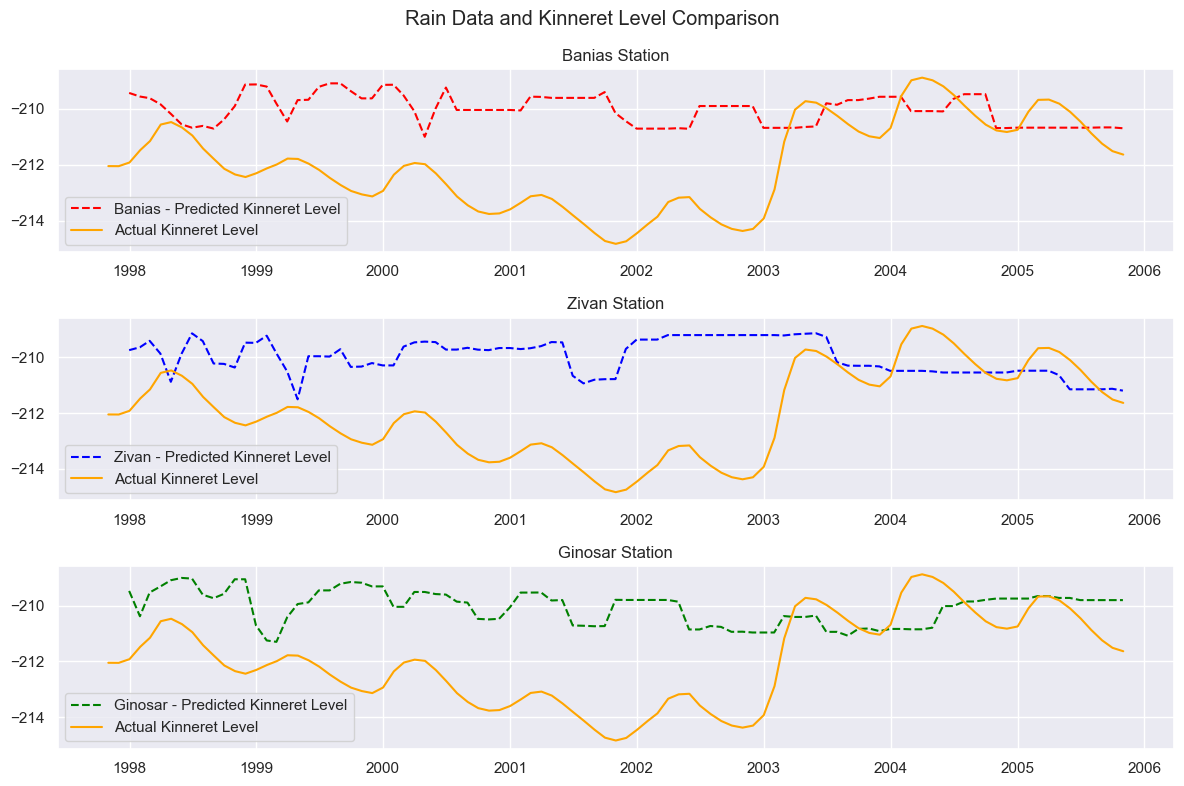

In [252]:
plt.figure(figsize=(12, 8))
plt.suptitle('Rain Data and Kinneret Level Comparison')

plt.subplot(3, 1, 1)
plt.plot(Date, y1_pred, label= "Banias - Predicted Kinneret Level", color = "red",linestyle='--')
plt.plot(df_kinneret_00s_avg["Date"], df_kinneret_00s_avg["Kinneret_Level"],
         label="Actual Kinneret Level",color = "orange")
plt.legend()
plt.title('Banias Station')

plt.subplot(3, 1, 2)
plt.plot(Date, y2_pred, label= "Zivan - Predicted Kinneret Level", color = 'blue',linestyle='--')
plt.plot(df_kinneret_00s_avg["Date"], df_kinneret_00s_avg["Kinneret_Level"],
         label="Actual Kinneret Level",color = "orange")
plt.legend()
plt.title('Zivan Station')

plt.subplot(3, 1, 3)
plt.plot(Date, y3_pred, label= "Ginosar - Predicted Kinneret Level", color = 'green',linestyle='--')
plt.plot(df_kinneret_00s_avg["Date"], df_kinneret_00s_avg["Kinneret_Level"],
         label="Actual Kinneret Level",color = "orange")
plt.legend()
plt.title('Ginosar Station')

plt.tight_layout()
plt.show()

Well, we see that each predicted Kinneret level **isn't matching** the actual level.
Maybe only through 2003-2006 there is a little match but not a good one.

Lets calculate each station MeanSquaredError 

In [253]:
df_kinneret_00s_avg= df_kinneret_00s_avg.set_index('Date')
y_true = df_kinneret_00s_avg[df_kinneret_00s_avg.index >= '1997-11-01']['Kinneret_Level']
#Converting to data frame to calculate easily the MSE
df_y1_pred = pd.DataFrame(y1_pred)
df_y2_pred = pd.DataFrame(y2_pred)
df_y3_pred = pd.DataFrame(y3_pred)

#The actual meassure have 97 samples while the predicted has 95.
#I will match the number of samples to calculate the MSE. 
#Neglecting 2 samples out of 97 won't do no harm.

y1_true = y_true.iloc[df_y1_pred.index]
y2_true = y_true.iloc[df_y2_pred.index]
y3_true = y_true.iloc[df_y3_pred.index]

#Calculation
mse1 = mean_squared_error(y1_true, df_y1_pred)
mse2 = mean_squared_error(y2_true, df_y2_pred)
mse3 = mean_squared_error(y3_true, df_y3_pred)

print('MSE for Banias Station:', mse1)
print('MSE for Zivan Station:', mse2)
print('MSE for Ginosar Station:', mse3)

MSE for Banias Station: 6.808018405479787
MSE for Zivan Station: 7.901281749572361
MSE for Ginosar Station: 6.429377322952656
